In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import cv2

In [2]:
file_no=3
files=sorted(glob("raw_data/*21*/KF/*"))
file=files[file_no]

In [68]:
df=pd.read_csv(file)
len(df)

8350

In [60]:
a=np.array(df["time"][0],np.longdouble)
print(a)

1700535641.7786304951


In [4]:
sonars=df.loc[df["sensor"]=="sonar_depth"]
imus=df.loc[df["sensor"]=="imu"]

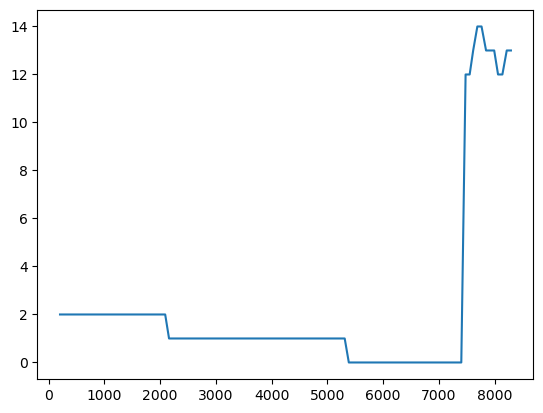

In [5]:
plt.plot(sonars["sonar_distance_y"])

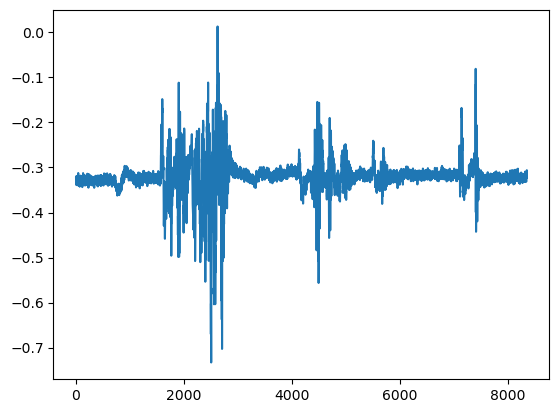

In [6]:
plt.plot(imus["sonar_distance_x"])


In [7]:
camera_data=sorted(glob("raw_data/*21*/camera/*"))


In [8]:
camera_data_clean=[x.split("/")[-1].split(".")[0] for x in camera_data]
camera_data_clean=[x.split("_")[0]+"."+x.split("_")[1] for x in camera_data_clean]

In [9]:
camera_timestamps=np.array(camera_data_clean,np.float128)

In [10]:
sonar_timestamps=np.array(sonars["time"],np.float128)

In [11]:
lst=[]
for x in sonar_timestamps:
    lst.append(np.argmin(np.abs(camera_timestamps-x)))

In [43]:
camera_timestamps[5]

1700534368.1703023

In [13]:
lst_np=np.array(lst)

In [14]:
files2=sorted(glob("../Analysis/processed_data/Nov_21/*/output.csv"))
files2

['../Analysis/processed_data/Nov_21/2/output.csv',
 '../Analysis/processed_data/Nov_21/3/output.csv',
 '../Analysis/processed_data/Nov_21/4/output.csv',
 '../Analysis/processed_data/Nov_21/5/output.csv',
 '../Analysis/processed_data/Nov_21/6/output.csv',
 '../Analysis/processed_data/Nov_21/7/output.csv']

In [15]:
df2=pd.read_csv(files2[3])
df2

,%time,field.x,field.y,field.z
0,1701944384293378458,0.000000e+00,0.000000e+00,0.000000e+00
1,1701944384294940148,-4.803525e-09,-5.568818e-10,6.583000e-09
2,1701944384296286874,-1.752735e-08,-3.468276e-09,2.396829e-08
3,1701944384297615513,-3.897200e-08,-1.039335e-08,5.324859e-08
4,1701944384298874104,-6.733355e-08,-1.991661e-08,9.191407e-08
...,...,...,...,...
9882,1701944398364998581,-1.461380e-06,-3.745897e-03,1.500000e+01
9883,1701944398366270505,-1.458023e-06,-3.745636e-03,1.500000e+01
9884,1701944398367657709,-1.447350e-06,-3.745335e-03,1.500000e+01
9885,1701944398369694789,-1.416932e-06,-3.744867e-03,1.500001e+01


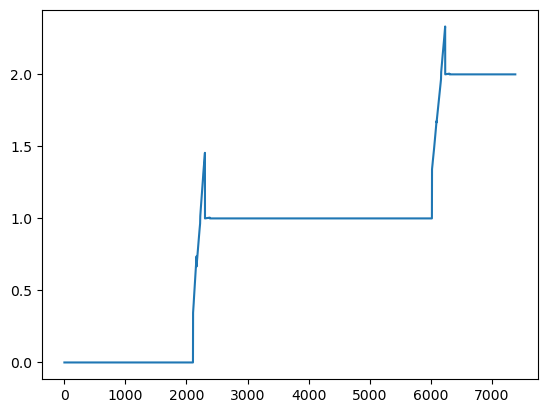

In [16]:
plt.plot(-np.asarray(df2["field.z"][2500:])+df2["field.z"][2500])

In [22]:
trajectory=-np.asarray(df2["field.z"][2500:])+df2["field.z"][2500]
time=np.asarray(df2["%time"][2500:])
init=trajectory[0]
diff=0.3
for x,y in zip(trajectory[1:],time[1:]):
    if(np.abs(x-init)>=diff):
        print(y)
        init=x

1701944390909096754
1701944390977043121
1701944391075642422
1701944391142249717
1701944396493832172
1701944396593430241
1701944396676699671


In [31]:
float_time=np.array(y/np.power(10,9),np.float128)
float_time

array(1.7019444e+09, dtype=float128)

../Analysis/processed_data/Nov_21/5/sonar_raw.csv


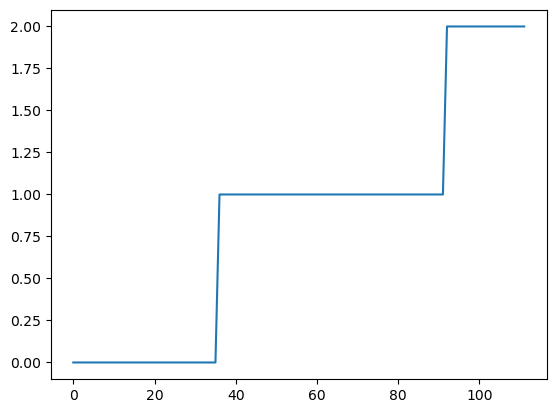

In [127]:
files3=sorted(glob("../Analysis/processed_data/Nov_21/*/sonar_raw.csv"))
df3=pd.read_csv(files3[0])
print(files3[0])
plt.plot(np.asarray(df3["field.distance_2"][30:]))

In [113]:
df3

,%time,field.x,field.y,field.z
0,1701944384444515258,0.0,0.679640,18.000000
1,1701944384450811784,0.0,0.680493,19.666666
2,1701944384548309821,0.0,0.680834,24.333334
3,1701944384644228235,0.0,0.683902,30.000000
4,1701944384723136325,0.0,0.684584,34.666668
...,...,...,...,...
137,1701944397950510215,0.0,0.685266,2.000000
138,1701944398055756400,0.0,0.685947,2.000000
139,1701944398151730246,0.0,0.686629,2.000000
140,1701944398226086671,0.0,0.686970,2.000000


In [70]:
template = cv2.imread('/home/uwr/Desktop/2023_UWR/Analysis/processed_data/Nov_21/2/1700535635_2156019.png')
target = template[:,:]

# Convert the images to grayscale
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

# Perform cross-correlation
result = cv2.matchTemplate(target_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Print the correlation map values
print("Correlation Map:")
print(result)

# Find the location of the best match using cv2.minMaxLoc
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Print the correlation scores and match locations
print("Minimum correlation value:", min_val)
print("Maximum correlation value:", max_val)
print("Location of minimum correlation:", min_loc)
print("Location of maximum correlation:", max_loc)

# Draw a rectangle around the matched region based on the maximum correlation location
h, w = template_gray.shape
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(target, top_left, bottom_right, (0, 255, 0), 2)

# Display the result
cv2.imshow('Matched Result', target)

Correlation Map:
[[0.9999985]]
Minimum correlation value: 0.9999985098838806
Maximum correlation value: 0.9999985098838806
Location of minimum correlation: (0, 0)
Location of maximum correlation: (0, 0)


In [67]:
print(np.array(df2["%time"][0],np.float128)/np.power(10,10))

170194438.4293378458


In [66]:
df2["%time"][0]

1701944384293378458